# 002 - Exploratory Data Analysis of Grammy Data

## **Data Loading**

In [1]:
import os
import json
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
try:
    os.chdir("../../Workshop_002")
except FileNotFoundError:
    print("""
        FileNotFoundError - Puede que el directorio no exista o no estas ubicad@ en la ruta especificada.
        """)
os.chdir("..")
print(os.getcwd())

c:\Users\natym\Desktop


In [3]:
with open("Workshop_002/credentials.json", "r", encoding = "utf-8") as f:
    credentials = json.load(f)

db_host = credentials["db_host"]
db_name = credentials["db_name"]
db_user = credentials["db_user"]
db_password = credentials["db_password"]

db_engine = create_engine(f"postgresql://{db_user}:{db_password}@{db_host}:5432/{db_name}")

In [4]:
query = "SELECT * FROM grammys_raw_data;"
grammy_df = pd.read_sql(query, db_engine)
grammy_df.head()

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True


## **Dataset information**

In [5]:
grammy_df.shape

(4810, 10)

In [6]:
grammy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          4810 non-null   int64 
 1   title         4810 non-null   object
 2   published_at  4810 non-null   object
 3   updated_at    4810 non-null   object
 4   category      4810 non-null   object
 5   nominee       4804 non-null   object
 6   artist        2970 non-null   object
 7   workers       2620 non-null   object
 8   img           3443 non-null   object
 9   winner        4810 non-null   bool  
dtypes: bool(1), int64(1), object(8)
memory usage: 343.0+ KB


In this case the columns "published_at", "updated_at" and "img" aren't useful for the analysis, for this reason they will be eliminated. 

In [7]:
grammy_df = grammy_df.drop(['published_at', 'updated_at', 'img'], axis=1)
grammy_df.head()

,year,title,category,nominee,artist,workers,winner
0,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",True
1,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",True
2,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",True
3,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",True
4,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",True


In [8]:
grammy_df.nunique()

year          62
title         62
category     638
nominee     4131
artist      1658
workers     2366
winner         1
dtype: int64

In [9]:
grammy_df.isnull().sum()

year           0
title          0
category       0
nominee        6
artist      1840
workers     2190
winner         0
dtype: int64

In [10]:
grammy_df.describe(include='object')

,title,category,nominee,artist,workers
count,4810,4810,4804,2970,2620
unique,62,638,4131,1658,2366
top,62nd Annual GRAMMY Awards (2019),Song Of The Year,Robert Woods,(Various Artists),"John Williams, composer (John Williams)"
freq,433,70,7,66,20


## **Data cleaning**

_**Nulls in "nominee"**_

In [11]:
grammy_df = grammy_df.dropna(subset=['nominee'])

_**Nulls in "artist"**_

Para ver los que son nulos en artist y worker

In [12]:
grammy_df[(grammy_df['artist'].isnull()) & (grammy_df['workers'].isnull())]

,year,title,category,nominee,artist,workers,winner
24,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Billie Eilish,None,None,True
25,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Black Pumas,None,None,True
26,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Lil Nas X,None,None,True
27,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Lizzo,None,None,True
28,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Maggie Rogers,None,None,True
...,...,...,...,...,...,...,...
4699,1961,4th Annual GRAMMY Awards (1961),Best New Artist Of 1961,Peter Nero,None,None,True
4745,1960,3rd Annual GRAMMY Awards (1960),Best New Artist Of 1960,Bob Newhart,None,None,True
4762,1959,2nd Annual GRAMMY Awards (1959),Best Classical Performance - Vocal Soloist (Wi...,Bjoerling In Opera,None,None,True
4781,1959,2nd Annual GRAMMY Awards (1959),Best New Artist Of 1959,Bobby Darin,None,None,True


Para ver las categorias en las que estan los nulos en asrtist y worker

In [13]:
null_categories = grammy_df[(grammy_df['artist'].isnull()) & (grammy_df['workers'].isnull())]['category'].unique()
print(null_categories)

['Best New Artist' 'Producer Of The Year, Non-Classical'
 'Producer Of The Year, Classical'
 'Best Small Ensemble Performance (With Or Without Conductor)'
 'Best Classical Vocal Performance' 'Producer Of The Year'
 'Classical Producer Of The Year' 'Best Producer Of The Year'
 'Producer Of The Year (Non-Classical)'
 'Producer Of The Year (Non Classical)' 'Best Classical Vocal Soloist'
 'Producer Of The Year, (Non Classical)'
 'Best Classical Vocal Soloist Performance'
 'Best Classical Performance - Instrumental Soloist Or Soloists (With Or Without Orchestra)'
 'Best New Classical Artist' 'Best New Artist Of The Year'
 'Best Classical Performance - Vocal Soloist'
 'Best Performance - Instrumental Soloist Or Soloists (With Or Without Orchestra)'
 'Most Promising New Classical Recording Artist' 'Best New Artist Of 1964'
 'Best New Artist Of 1963' 'Best New Artist Of 1962'
 'Best New Artist Of 1961' 'Best New Artist Of 1960'
 'Best Classical Performance - Vocal Soloist (With Or Without Orch

In [ ]:
categories_non_useful = [
    'Best Small Ensemble Performance (With or Without Conductor)',
    'Best Classical Vocal Performance',
    'Best Classical Vocal Soloist Performance',
    'Best Classical Performance - Instrumental Soloist or Soloists (With or Without Orchestra)',
    'Best Classical Performance - Vocal Soloist',
    'Best Performance - Instrumental Soloist or Soloists (With or Without Orchestra)',
    'Best Classical Performance - Vocal Soloist (With or Without Orchestra)'
]

filter = (
    (grammy_df['artist'].isnull()) &
    (grammy_df['workers'].isnull()) &
    (grammy_df['category'].isin(categories_non_useful))
)

grammy_df[filter]

,year,title,category,nominee,artist,workers,winner
2571,1997,40th Annual GRAMMY Awards (1997),Best Classical Vocal Performance,"An Italian Songbook - Works Of Bellini, Donize...",None,None,True
2834,1994,37th Annual GRAMMY Awards (1994),Best Classical Vocal Performance,The Impatient Lover - Italian Songs By Beethov...,None,None,True
2915,1993,36th Annual GRAMMY Awards (1993),Best Classical Vocal Performance,"The Art Of Arleen Auger (Works Of Larsen, Purc...",None,None,True
2999,1992,35th Annual GRAMMY Awards (1992),Best Classical Vocal Performance,"Kathleen Battle At Carnegie Hall (Handel, Moza...",None,None,True
3374,1987,30th Annual GRAMMY Awards (1987),Best Classical Vocal Soloist Performance,Kathleen Battle - Salzburg Recital,None,None,True
3767,1972,15th Annual GRAMMY Awards (1972),Best Classical Vocal Soloist Performance,Brahms: Die Schone Magelone,None,None,True
3942,1978,21st Annual GRAMMY Awards (1978),Best Classical Vocal Soloist Performance,Luciano Pavarotti - Hits From Lincoln Center,None,None,True
4039,1976,19th Annual GRAMMY Awards (1976),Best Classical Vocal Soloist Performance,Herbert: Music Of Victor Herbert,None,None,True
4135,1974,17th Annual GRAMMY Awards (1974),Best Classical Vocal Soloist Performance,Leontyne Price Sings Richard Strauss,None,None,True
4178,1960,3rd Annual GRAMMY Awards (1960),Best Classical Performance - Vocal Soloist,A Program Of Song - Leontyne Price Recital,None,None,True


A estos valores no es posible aplicarle un proceso para saber el artista y al ser tan pocos (12 filas), se pueden eliminar.

In [15]:
cantidad = grammy_df[filter].shape[0]
print(f"Número de filas a eliminar: {cantidad}")

Número de filas a eliminar: 12


In [16]:
grammy_df = grammy_df[~filter]

Ahora los valores de artist se llenaran con lo que hay en la columna de nominee, ya que como se pudo observar anteriormente en la columna de nominee esta contenido el artista. 

In [ ]:
condition = grammy_df['artist'].isnull() & grammy_df['workers'].isnull()
grammy_df.loc[condition, 'artist'] = grammy_df.loc[condition, 'nominee']

In [18]:
grammy_df[(grammy_df['artist'].isnull()) & (grammy_df['workers'].isnull())]

,year,title,category,nominee,artist,workers,winner


Ahora, en el dataset se puede evidenciar que los nombres de los artistas estan al final en parentesis en el dato de la columna de workers, por lo que se debe extraer ese dato de workers para pasarlo a artist.

In [19]:

def extract_artist(workers):
    match = re.search(r'\((.*?)\)', workers)
    if match:
        return match.group(1)
    return None

grammy_df["artist"] = (grammy_df.apply(lambda row:extract_artist(row["workers"])
        if pd.isna(row["artist"])
            else row["artist"], axis=1))

Haciendo este proceso los nulos se reducen considerablemente. 

In [20]:
grammy_df.isna().sum()

year           0
title          0
category       0
nominee        0
artist       288
workers     2172
winner         0
dtype: int64

In [21]:
def extract_artist(workers):
    if pd.isnull(workers):
        return None
    
    rule = re.match(r"([^,;]+), (soloist|composer|conductor|artist)", workers)
    if rule:
        return rule.group(1).strip()
    
    rule = re.match(r"(.+?(Featuring|&| and ).*?)(;|,|$)", workers, re.IGNORECASE)
    if rule:
        return rule.group(1).strip()
    
    return workers.strip()

grammy_df['artist'] = grammy_df['artist'].fillna(grammy_df['workers'].apply(extract_artist))

In [28]:
grammy_df.isna().sum()

year            0
title           0
category        0
nominee         0
artist          0
workers      2172
nominated       0
decade          0
dtype: int64

Tranformar Various Artists

In [29]:
grammy_df['artist'].value_counts()

artist
(Various Artists)               66
Various Artists                 43
Chicago Symphony Orchestra      29
John Williams                   24
Henry Mancini                   22
                                ..
Tank And The Bangas              1
Ariana Grande & Social House     1
Jonah Jones                      1
Erich Leinsdorf                  1
Bjoerling In Opera               1
Name: count, Length: 2486, dtype: int64

In [30]:

grammy_df['artist'] = grammy_df['artist'].replace({'(Various Artists)': 'Various Artists'})
grammy_df['artist'].value_counts()

artist
Various Artists                               109
Chicago Symphony Orchestra                     29
John Williams                                  24
Henry Mancini                                  22
Vladimir Horowitz                              20
                                             ... 
Dinah Washington                                1
Peter Ustinov (Herbert von Karajan, cond.)      1
Perry Como                                      1
Billy May                                       1
Keely Smith, Louis Prima                        1
Name: count, Length: 2485, dtype: int64

Winner true - cambiar la columna a nominated

In [22]:
grammy_df = grammy_df.rename(columns={'winner': 'nominated'})
grammy_df.head()

,year,title,category,nominee,artist,workers,nominated
0,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",True
1,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",True
2,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",True
3,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",True
4,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",True


Eliminar la columna de workers

In [31]:
grammy_df = grammy_df.drop(["workers"], axis=1)

In [32]:
grammy_df.head()

,year,title,category,nominee,artist,nominated,decade
0,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,True,2010
1,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,"Hey, Ma",Bon Iver,True,2010
2,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,7 rings,Ariana Grande,True,2010
3,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Hard Place,H.E.R.,True,2010
4,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Talk,Khalid,True,2010


In [23]:
grammy_df['decade'] = (grammy_df['year'] // 10) * 10
grammy_df.head()

,year,title,category,nominee,artist,workers,nominated,decade
0,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",True,2010
1,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",True,2010
2,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",True,2010
3,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",True,2010
4,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",True,2010


## **Exploratory Analysis**

**Analysis of categorical variables**

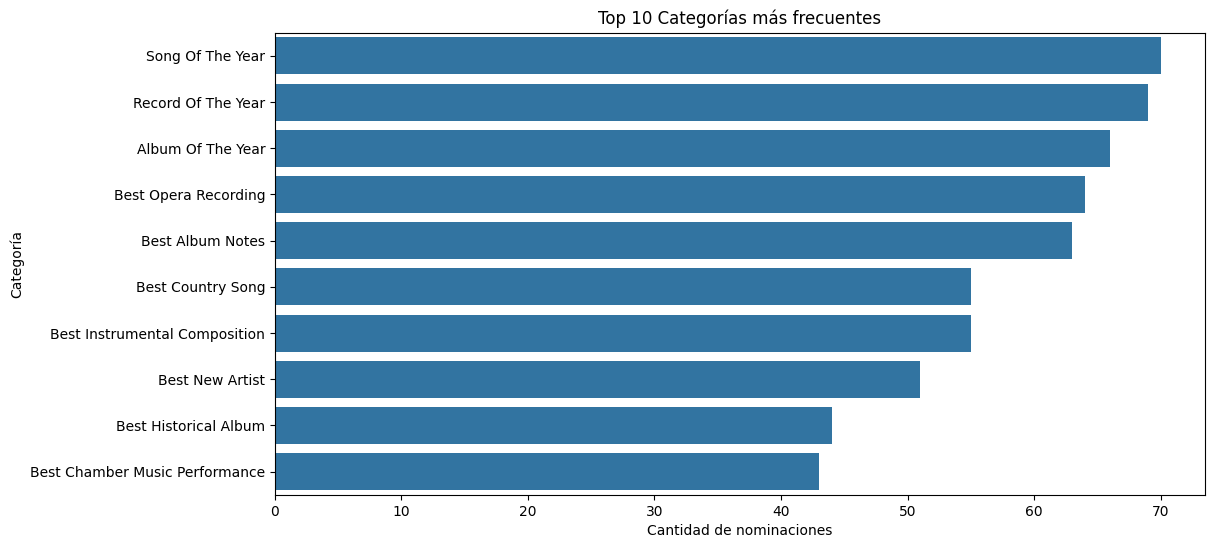

In [24]:

plt.figure(figsize=(12,6))
top_10_categorias = grammy_df['category'].value_counts().head(10)
sns.barplot(x=top_10_categorias.values, y=top_10_categorias.index)
plt.title('Top 10 Categorías más frecuentes')
plt.xlabel('Cantidad de nominaciones')
plt.ylabel('Categoría')
plt.show()

C:\Users\natym\AppData\Local\Temp\ipykernel_2092\2305084802.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')


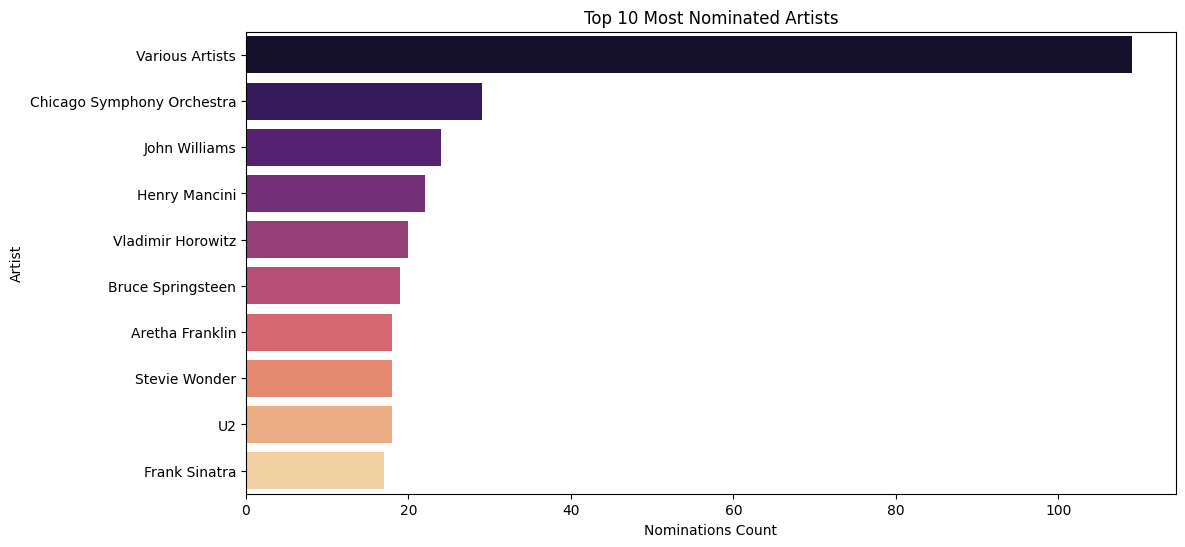

In [35]:
top_artists = grammy_df['artist'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')
plt.title('Top 10 Most Nominated Artists')
plt.xlabel('Nominations Count')
plt.ylabel('Artist')
plt.show()

**Analysis of numerical variables**

C:\Users\natym\AppData\Local\Temp\ipykernel_2092\1179093928.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=grammy_df, x='decade', palette='viridis')


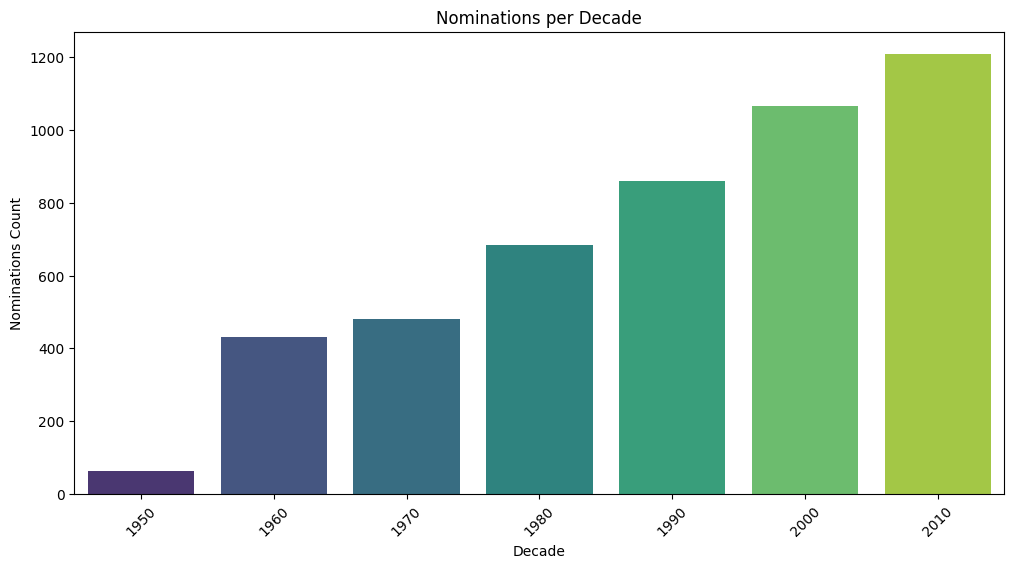

In [34]:
grammy_df['year'] = pd.to_numeric(grammy_df['year'])
plt.figure(figsize=(12,6))
sns.countplot(data=grammy_df, x='decade', palette='viridis')
plt.xticks(rotation=45)
plt.title('Nominations per Decade')
plt.xlabel('Decade')
plt.ylabel('Nominations Count')
plt.show()